# Assignment Task : Lumiq


### Loading the required libraries and data 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score

In [104]:
data = pd.read_csv('F:/Assg_Lumiq/Data.csv')

In [105]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,label
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,...,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832,0
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,...,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832,1
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,...,-0.415398,0.115614,-0.776461,-0.159069,1.815429,-0.322463,-0.143152,-0.865932,0.538832,8
3,3.701616,-1.404758,-1.796171,0.263228,0.142206,-0.327979,0.078298,0.339293,-2.803031,0.851896,...,1.510721,0.115614,2.344540,-0.159069,1.456431,-0.322463,-0.143152,-0.758705,0.538832,5
4,1.598397,-0.165481,1.795930,0.755155,-0.604168,-0.633534,-1.055088,-0.442009,1.344237,-0.536694,...,-0.415398,-0.357508,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,-0.651479,0.538832,9


## Getting the Information about the Data

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 0 to 17336
Columns: 135 entries, 0 to label
dtypes: float64(134), int64(1)
memory usage: 17.9 MB


## Checking if null values are present or not in the Data Set

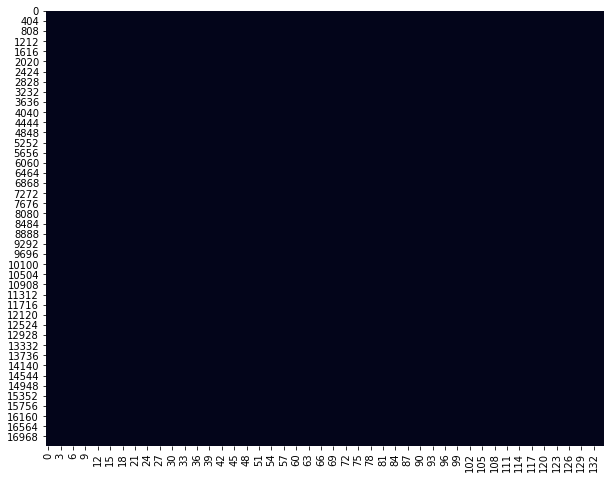

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)

## Ploting the bar plot for value counts of the Labels

Text(0, 0.5, 'Counts')

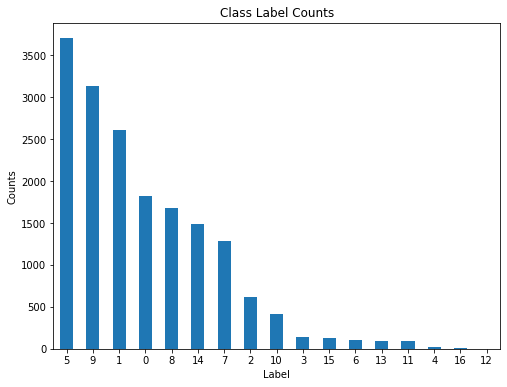

In [6]:
plt.figure(figsize=(8,6))

count_class = pd.value_counts(data['label'], sort=True)

count_class.plot(kind= 'bar', rot=0)

plt.title('Class Label Counts')

plt.xlabel('Label')

plt.ylabel('Counts')

## First Building the BaseLine Machine Learning Models using Logistic Regression, RandomForest and XGBoost considering all 134 features and validating it

In [107]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [108]:
def generate_accuracy(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x), average='micro')
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)

### Model 1 : LogisticRegression

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [110]:
clf.fit(x_train, y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.779123414071511
F1 score is:  0.7791234140715111


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model 2 : RandomForestClassifier

In [111]:
rf.fit(x_train, y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8520761245674741
F1 score is:  0.8520761245674741


### Model 3 : ExtremeGradientBoostingClassifier

In [112]:
xgb.fit(x_train, y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8604382929642446
F1 score is:  0.8604382929642447


In [175]:
data3 = {'ML Models' :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy'   :[77.9, 85.2, 86.04]}

acc = pd.DataFrame(data3)

acc

,ML Models,Accuracy
0,LogisticRegression,77.90
1,RandomForest,85.20
2,XGBoost,86.04


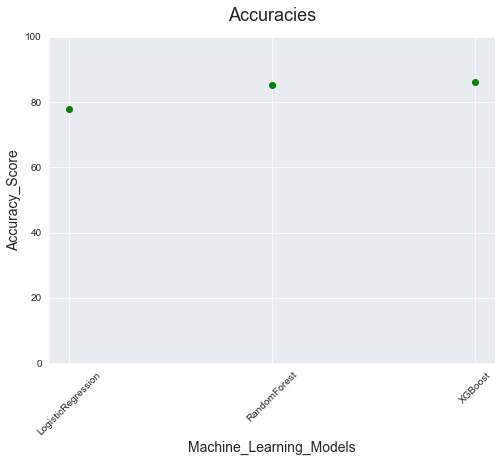

In [176]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy_Score', fontsize = 14)
plt.xlabel('Machine_Learning_Models', fontsize = 14)
plt.title('Accuracies', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML Models'], acc['Accuracy'], 'go')

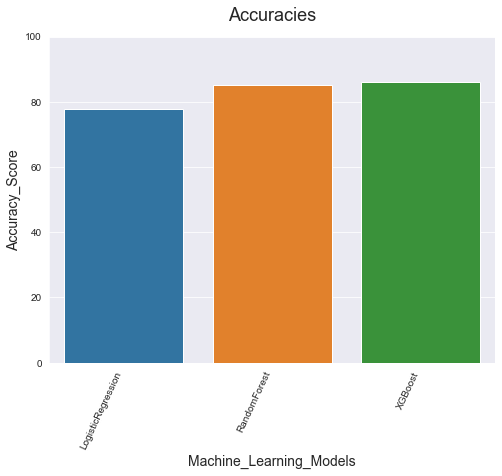

In [115]:
plt.figure(figsize=(8,6))
sns.set_style(style="darkgrid")
plt.title('Accuracies', fontsize = 18, y = 1.03)
plt.ylabel('Accuracy_Score', fontsize = 14)
plt.xlabel('Machine_Learning_Models', fontsize = 14)
plt.xticks(rotation=0, ha='right')
plt.ylim(0,100)
plt.xticks(rotation=65)
ax = sns.barplot(x="ML Models",y = "Accuracy", data=data3)

# Feature Selection Techniques

##  There are broadly 4 categories of it:
## 1. Filter Method
## 2. Wrapper Method and Embedded Method
## 3. Feature importance Using Tree Based Classifiers
## 4.  L1-based feature selection

# Type 1 : Filter Method

# Method  : SelectKBest 

## SelectKBest Method : The SelectKBest class just scores the features using a function (in this case f_classif but could be others) . Function taking two arrays X and y, and returns a single array with scores.

## Here the Function used is f_classif ( uses ANOVA Test to calculate the score )

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = data.iloc[:,0:-1] 
y = data.iloc[:,-1]

In [117]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [118]:
featureScores

,Specs,Score
0,0,156.944699
1,1,90.901027
2,2,310.758647
3,3,88.041004
4,4,91.534566
...,...,...
129,129,48.886008
130,130,292.781802
131,131,155.906711
132,132,253.041024


In [128]:
featureScores.nlargest(7,'Score')

,Specs,Score
113,113,1714.368666
72,72,1188.155941
96,96,986.589384
85,85,958.487835
70,70,952.705646
71,71,801.952500
65,65,711.267129


## Here I have considered five sets of Data with different number of features to know which one will give the get the best accuracy and suits with the models in which i will perform Machine Learning 

## First : The One with minimum score of 700 and above

## Second : The One with minimum score of 600 and above

## Third :  The One with minimum score of 400 and above

## Fourth :  The One with minimum score of 300 and above

## Fifth :  The One with minimum score of 200 and above

In [129]:
df1 = featureScores.nlargest(7,'Score') # Scores greater than 700
df2 = featureScores.nlargest(10,'Score') # Scores greater than 600
df3 = featureScores.nlargest(30,'Score') # Scores greater than 400
df4 = featureScores.nlargest(49,'Score') # Scores greater than 300
df5 = featureScores.nlargest(69,'Score') # Scores greater than 200
col1 = df1['Specs'].to_list()
col2 = df2['Specs'].to_list()
col3 = df3['Specs'].to_list()
col4 = df4['Specs'].to_list()
col5 = df5['Specs'].to_list()
Df1  = data[col1]
Df2  = data[col2]
Df3  = data[col3]
Df4  = data[col4]
Df5  = data[col5]

In [131]:
Df1

,113,72,96,85,70,71,65
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498


In [132]:
Df2

,113,72,96,85,70,71,65,91,76,97
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665


In [133]:
Df3

,113,72,96,85,70,71,65,91,76,97,...,86,103,80,89,67,59,94,105,82,73
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,0.226348,0.558248,-0.943919,0.444880,0.560834
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.785413,-1.623759,-1.585584,-0.463005,-1.603430,0.226348,1.734370,-1.528547,-0.206783,-1.559182
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.785413,-1.623759,-1.585584,-0.463005,-1.603430,-0.341224,1.734370,-1.528547,-0.206783,-1.559182
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.975378,0.841009,-0.689262,-1.114095,1.143882,-0.341224,-1.527739,1.411413,-1.179941,0.603193
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.975378,0.841009,-0.689262,-1.114095,1.143882,6.469631,-1.527739,1.411413,-1.179941,0.603193


In [134]:
Df4

,113,72,96,85,70,71,65,91,76,97,...,68,61,38,79,19,7,60,98,2,33
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,-1.848086,-1.503210,0.159144,0.226110,1.632386,0.939621,0.738142,-1.161452,0.864091
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.575377,0.999451,0.159144,-0.662573,0.007252,0.108530,0.738142,-2.056736,-0.223796
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.548745,0.005752,0.159144,0.140167,0.601497,0.364250,0.738142,0.030206,0.461599
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.488824,0.812722,0.159144,-0.518279,0.339293,0.316302,0.738142,-1.796171,0.172069
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,-0.463250,-0.603825,0.159144,0.349404,-0.442009,0.939621,0.738142,1.795930,-0.323634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.214260,-0.601734,0.005752,0.951645,0.140167,0.601497,1.438275,2.906519,0.030206,0.461599
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.214260,0.090684,-0.496355,0.951645,1.097358,1.075955,0.773402,2.906519,-0.449048,0.405323
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.936362,-1.848086,-0.452617,0.755306,-1.302674,-2.221331,-1.553653,0.593495,-1.669528,-1.926168
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.936362,-0.154982,-0.100636,0.755306,-1.586299,-0.062259,1.247010,0.593495,0.286161,0.119286


In [135]:
Df5

,113,72,96,85,70,71,65,91,76,97,...,41,102,30,92,40,46,83,84,81,23
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.958911,-3.028270,0.555455,0.077495,0.309263,-0.156046,-2.560023,-0.756626,-3.271733,0.390958
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.451498,-3.028270,0.797356,0.077495,-1.045948,-2.458225,-2.560023,-0.756626,-3.271733,0.470486
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.153561,-3.028270,-1.182271,0.077495,-0.387577,-0.448275,-2.560023,-0.756626,-3.271733,-0.225943
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,1.141647,-3.028270,-1.164497,0.077495,-0.702430,-0.922842,-2.560023,-0.756626,-3.271733,-0.016048
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.293822,-3.028270,-0.073803,0.077495,2.915756,0.461700,-2.560023,-0.756626,-3.271733,1.400092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,0.153561,-0.635776,-1.182271,-0.183000,-0.387577,-0.448275,0.684935,0.082434,0.135126,-0.225943
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-2.243489,-0.635776,-1.246488,-0.183000,-0.972849,1.147504,0.684935,0.082434,0.135126,-1.557819
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-1.269524,0.151747,-0.044465,-0.310152,0.658095,1.386316,0.304160,0.585044,-0.369083,-0.731317
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.452781,0.151747,1.442174,-0.310152,-0.425702,-1.705648,0.304160,0.585044,-0.369083,-0.477163


In [136]:
Exp_1 = pd.concat([Df1, data['label']], axis=1)
Exp_2 = pd.concat([Df2, data['label']], axis=1)
Exp_3 = pd.concat([Df3, data['label']], axis=1)
Exp_4 = pd.concat([Df4, data['label']], axis=1)
Exp_5 = pd.concat([Df5, data['label']], axis=1)

In [140]:
Exp_1

,113,72,96,85,70,71,65,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,9
...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1


In [141]:
Exp_2

,113,72,96,85,70,71,65,91,76,97,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,9
...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,1


In [143]:
Exp_3

,113,72,96,85,70,71,65,91,76,97,...,103,80,89,67,59,94,105,82,73,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,0.226348,0.558248,-0.943919,0.444880,0.560834,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-1.623759,-1.585584,-0.463005,-1.603430,0.226348,1.734370,-1.528547,-0.206783,-1.559182,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-1.623759,-1.585584,-0.463005,-1.603430,-0.341224,1.734370,-1.528547,-0.206783,-1.559182,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.841009,-0.689262,-1.114095,1.143882,-0.341224,-1.527739,1.411413,-1.179941,0.603193,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.841009,-0.689262,-1.114095,1.143882,6.469631,-1.527739,1.411413,-1.179941,0.603193,1


In [144]:
Exp_4

,113,72,96,85,70,71,65,91,76,97,...,61,38,79,19,7,60,98,2,33,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-1.848086,-1.503210,0.159144,0.226110,1.632386,0.939621,0.738142,-1.161452,0.864091,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.575377,0.999451,0.159144,-0.662573,0.007252,0.108530,0.738142,-2.056736,-0.223796,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.548745,0.005752,0.159144,0.140167,0.601497,0.364250,0.738142,0.030206,0.461599,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.488824,0.812722,0.159144,-0.518279,0.339293,0.316302,0.738142,-1.796171,0.172069,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.463250,-0.603825,0.159144,0.349404,-0.442009,0.939621,0.738142,1.795930,-0.323634,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.601734,0.005752,0.951645,0.140167,0.601497,1.438275,2.906519,0.030206,0.461599,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,0.090684,-0.496355,0.951645,1.097358,1.075955,0.773402,2.906519,-0.449048,0.405323,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-1.848086,-0.452617,0.755306,-1.302674,-2.221331,-1.553653,0.593495,-1.669528,-1.926168,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.154982,-0.100636,0.755306,-1.586299,-0.062259,1.247010,0.593495,0.286161,0.119286,1


In [146]:
Exp_5

,113,72,96,85,70,71,65,91,76,97,...,102,30,92,40,46,83,84,81,23,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,0.555455,0.077495,0.309263,-0.156046,-2.560023,-0.756626,-3.271733,0.390958,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,0.797356,0.077495,-1.045948,-2.458225,-2.560023,-0.756626,-3.271733,0.470486,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-1.182271,0.077495,-0.387577,-0.448275,-2.560023,-0.756626,-3.271733,-0.225943,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-1.164497,0.077495,-0.702430,-0.922842,-2.560023,-0.756626,-3.271733,-0.016048,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-0.073803,0.077495,2.915756,0.461700,-2.560023,-0.756626,-3.271733,1.400092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.635776,-1.182271,-0.183000,-0.387577,-0.448275,0.684935,0.082434,0.135126,-0.225943,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.635776,-1.246488,-0.183000,-0.972849,1.147504,0.684935,0.082434,0.135126,-1.557819,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.151747,-0.044465,-0.310152,0.658095,1.386316,0.304160,0.585044,-0.369083,-0.731317,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.151747,1.442174,-0.310152,-0.425702,-1.705648,0.304160,0.585044,-0.369083,-0.477163,1


## Dividing the DataSet based on dependent and independent features 

In [148]:
x = Exp_1.iloc[:,:-1].values
y = Exp_1.iloc[:,-1].values
x2 = Exp_2.iloc[:,:-1].values
y2 = Exp_2.iloc[:,-1].values
x3 = Exp_3.iloc[:,:-1].values
y3 = Exp_3.iloc[:,-1].values
x4 = Exp_4.iloc[:,:-1].values
y4 = Exp_4.iloc[:,-1].values
x5 = Exp_5.iloc[:,:-1].values
y5 = Exp_5.iloc[:,-1].values

## Starting with building the ML Model based on base Machine Learning Algorithms - Logistic Regression and Validating it 


In [149]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.2, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3, test_size=0.2, random_state=42)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4,y4, test_size=0.2, random_state=42)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [152]:
clf.fit(x_train1,y_train1)
generate_accuracy(clf, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [153]:
clf.fit(x_train2,y_train2)
generate_accuracy(clf, x_test2, y_test2)

Accuracy is:  0.4749134948096886
F1 score is:  0.4749134948096886


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [154]:
clf.fit(x_train3,y_train3)
generate_accuracy(clf, x_test3, y_test3)

Accuracy is:  0.5657439446366782
F1 score is:  0.5657439446366782


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [155]:
clf.fit(x_train4,y_train4)
generate_accuracy(clf, x_test4, y_test4)

Accuracy is:  0.7081891580161477
F1 score is:  0.7081891580161477


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [156]:
clf.fit(x_train5,y_train4)
generate_accuracy(clf, x_test5, y_test5)

Accuracy is:  0.7459630911188004
F1 score is:  0.7459630911188004


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [169]:
d1 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200'],
        'Accuracy':[47.2, 47.5, 56.57, 70.81, 74.6]}

acc = pd.DataFrame(d1)

acc

,Score,Accuracy
0,Score>700,47.20
1,Score>600,47.50
2,Score>400,56.57
3,Score>300,70.81
4,Score>200,74.60


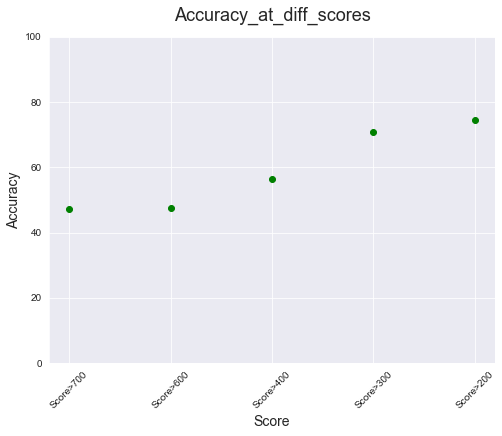

In [171]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

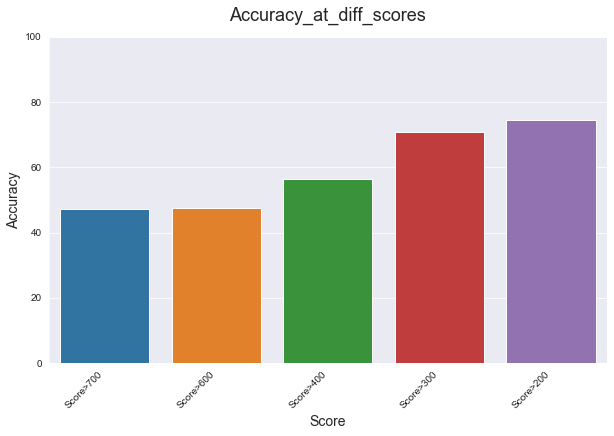

In [173]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d1)

## RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [177]:
rf.fit(x_train1,y_train1)
generate_accuracy(rf, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [178]:
rf.fit(x_train2,y_train2)
generate_accuracy(rf, x_test2, y_test2)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [179]:
rf.fit(x_train3,y_train3)
generate_accuracy(rf, x_test3, y_test3)

Accuracy is:  0.6508073817762399
F1 score is:  0.6508073817762399


In [180]:
rf.fit(x_train4,y_train4)
generate_accuracy(rf, x_test4, y_test4)

Accuracy is:  0.8171856978085352
F1 score is:  0.8171856978085351


In [181]:
rf.fit(x_train5,y_train5)
generate_accuracy(rf, x_test5, y_test5)

Accuracy is:  0.8388119953863898
F1 score is:  0.8388119953863898


In [182]:
d2 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200'],
        'Accuracy':[47.23, 47.23, 65.08, 81.71, 83.88]}

acc = pd.DataFrame(d2)

acc

,Score,Accuracy
0,Score>700,47.23
1,Score>600,47.23
2,Score>400,65.08
3,Score>300,81.71
4,Score>200,83.88


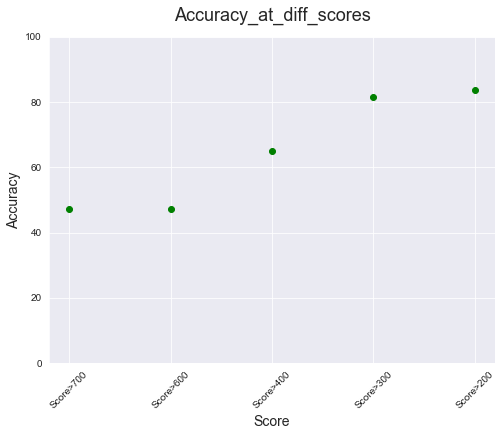

In [183]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

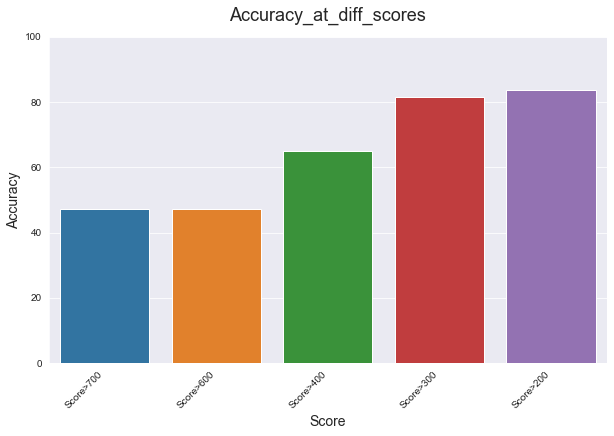

In [184]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d2)

## ExtremeGradientBoosting Classifier

In [187]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [189]:
xgb.fit(x_train1,y_train1)
generate_accuracy(xgb, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [190]:
xgb.fit(x_train2,y_train2)
generate_accuracy(xgb, x_test2, y_test2)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [191]:
xgb.fit(x_train3,y_train3)
generate_accuracy(xgb, x_test3, y_test3)

Accuracy is:  0.6585928489042676
F1 score is:  0.6585928489042676


In [28]:
xgb.fit(x_train4,y_train4)
generate_accuracy(xgb, x_test4, y_test4)

0.8194925028835064

In [192]:
xgb.fit(x_train5,y_train5)
generate_accuracy(xgb, x_test5, y_test5)

Accuracy is:  0.8440023068050749
F1 score is:  0.8440023068050749


In [193]:
d2 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200'],
        'Accuracy':[47.23, 47.23, 65.85, 81.9, 84.4]}

acc = pd.DataFrame(d2)

acc

,Score,Accuracy
0,Score>700,47.23
1,Score>600,47.23
2,Score>400,65.85
3,Score>300,81.90
4,Score>200,84.40


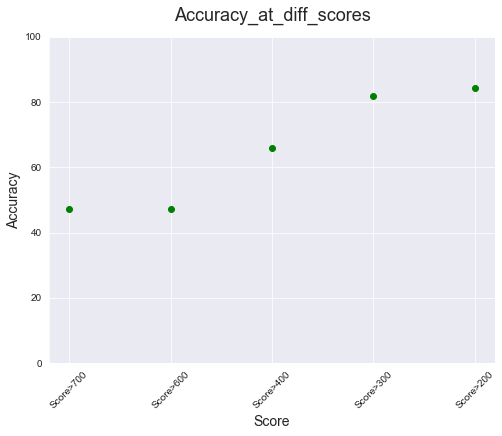

In [194]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

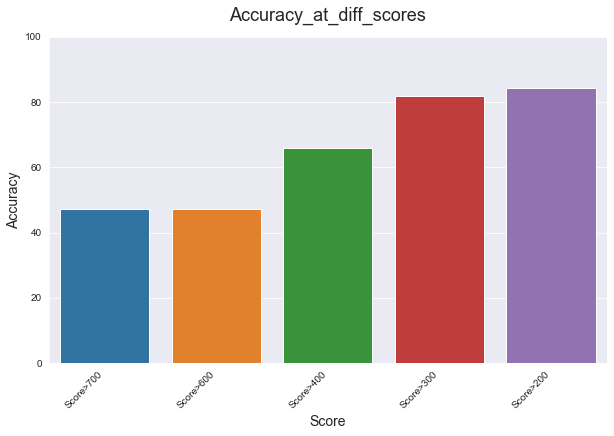

In [195]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d2)

# Method 2 : Wrapper and Embedded methods

## Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20) here i have (134 features)

# Method 3 : Feature importance Using Tree Based Classifiers


### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable

[8.32329723e-03 5.82048077e-03 1.06848692e-02 7.01226986e-03
 7.64696968e-03 6.90406281e-03 6.91112656e-03 9.18893970e-03
 8.99088485e-03 8.23348399e-03 6.30090474e-03 8.09368521e-03
 6.37530043e-03 6.78771980e-03 6.48801213e-03 7.53787833e-03
 8.00590099e-03 6.76096663e-03 9.61292484e-03 6.98758251e-03
 7.07586754e-03 7.09371228e-03 8.79043086e-03 7.14833574e-03
 9.10195937e-03 9.89071941e-03 8.21511863e-03 6.07402772e-03
 8.52098771e-03 7.07610441e-03 1.49154828e-02 7.68822736e-03
 6.16429133e-03 9.11337437e-03 7.58805534e-03 6.36654671e-03
 7.32047524e-03 7.20128625e-03 1.17832276e-02 6.58947330e-03
 1.00618747e-02 7.71346594e-03 7.04778563e-03 1.11198899e-02
 6.45778397e-03 8.21000192e-03 6.37557903e-03 9.25619140e-03
 5.24845003e-03 7.03808560e-03 1.94339375e-02 2.97735587e-03
 1.65992588e-02 1.73925289e-02 1.44765453e-02 2.17731449e-02
 7.62674036e-03 1.68441860e-02 1.76135376e-02 8.96984081e-03
 2.55879792e-02 2.43505019e-02 2.76508904e-02 2.70755754e-03
 3.29619470e-03 2.460193

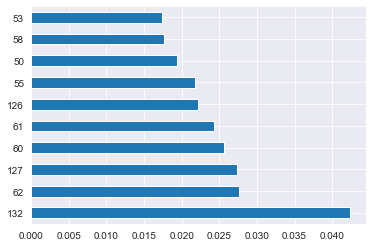

In [197]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [202]:
df = data[['53','58','50','55','126','61','60','127','62','132','label']]
df

,53,58,50,55,126,61,60,127,62,132,label
0,-0.552641,-0.392835,-0.546214,-0.428871,-0.452132,-1.848086,0.939621,-0.360327,0.835272,-1.080384,0
1,-0.552641,0.010922,-0.546214,-0.182729,-0.215571,0.575377,0.108530,0.263873,0.086622,-0.973158,1
2,-0.552641,-0.392835,1.492851,0.008714,0.115614,0.548745,0.364250,-0.776461,-0.028555,-0.865932,8
3,-0.552641,0.212801,1.201556,0.200157,0.115614,0.488824,0.316302,2.344540,-0.287703,-0.758705,5
4,0.816289,-0.392835,-0.254919,-0.428871,-0.357508,-0.463250,0.939621,-0.776461,-0.662028,-0.651479,9
...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.552641,-0.190956,-0.546214,-0.264776,-0.215571,-0.601734,1.438275,0.471940,-0.512298,0.099106,1
17333,-0.552641,0.212801,-0.546214,-0.128031,-0.191915,0.090684,0.773402,0.263873,-0.212838,0.206332,1
17334,-0.552641,-0.392835,-0.546214,-0.456220,-0.475789,-1.848086,-1.553653,-0.568394,-1.410678,0.313558,2
17335,-0.552641,5.057892,1.492851,5.916108,5.556521,-0.154982,1.247010,0.055806,-0.595367,0.420785,1


In [204]:
x_m2 = df.iloc[:,:-1].values
y_m2 = df.iloc[:,-1].values

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x_m2,y_m2, test_size=0.2, random_state=42)

## LogisticRegression

In [206]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.6433102652825836
F1 score is:  0.6433102652825836


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [207]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.7626874279123415
F1 score is:  0.7626874279123413


## ExtremeGradientBoosting

In [208]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.7612456747404844
F1 score is:  0.7612456747404844


In [210]:
d3 = {'ML_Model'  :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[64.3,76.26,76.1]}

acc = pd.DataFrame(d3)

acc

,ML_Model,Accuracy
0,LogisticRegression,64.30
1,RandomForest,76.26
2,XGBoost,76.10


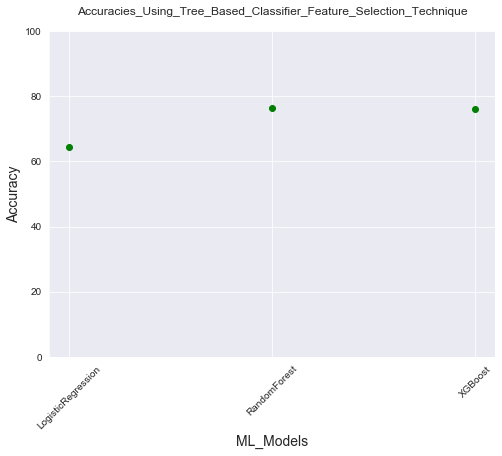

In [220]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Feature_Selection_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

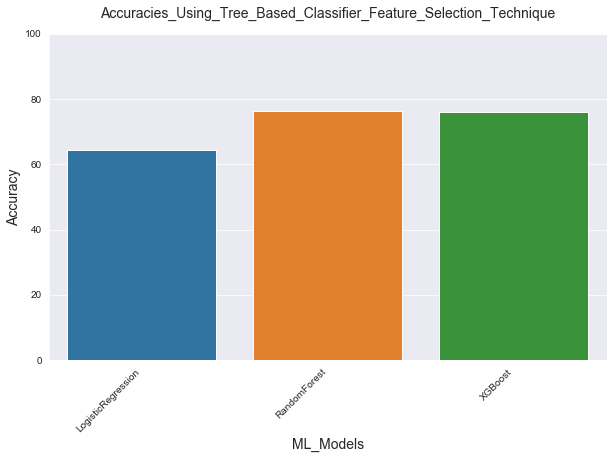

In [218]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Feature_Selection_Technique', fontsize = 14, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d3)

# Method 4 : L1-based feature selection


## Since each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus L1 regularization produces sparse solutions, inherently performing feature selection

## Performing L1 regularization on Support Vector Machine and LogisticRegression Algorithm

In [221]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [222]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

C:\Users\AAA\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(17337, 112)

In [230]:
x_train, x_test, y_train, y_test = train_test_split(X_new ,Y, test_size=0.2, random_state=42)

In [226]:
lsvc.fit(x_train, y_train)
generate_accuracy(lsvc, x_test, y_test)

Accuracy is:  0.7647058823529411
F1 score is:  0.7647058823529412


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Logistic Regression

In [229]:
lg = LogisticRegression(penalty="l1", solver='saga').fit(X, Y)
model = SelectFromModel(lg, prefit=True)
X_new = model.transform(X)
X_new.shape

C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(17337, 134)

In [231]:
lg.fit(x_train, y_train)
generate_accuracy(lg, x_test, y_test)

Accuracy is:  0.7779700115340253
F1 score is:  0.7779700115340253


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [232]:
d4 = {'ML_Model'  :['LogisticRegression','SVM'],
        'Accuracy':[76.4, 77.8]}

acc = pd.DataFrame(d4)

acc

,ML_Model,Accuracy
0,LogisticRegression,76.4
1,SVM,77.8


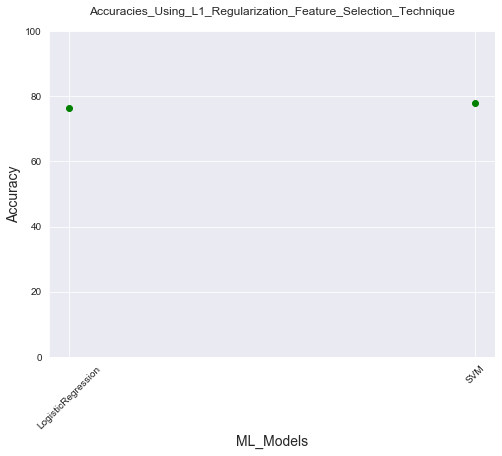

In [233]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_L1_Regularization_Feature_Selection_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

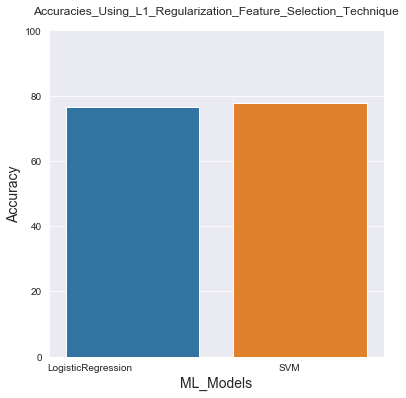

In [238]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_L1_Regularization_Feature_Selection_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=0, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d4)